In [1]:
import pandas as pd
get_ipython().magic(u'matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('/home/sysadmin/zhicongchen/DataSets/phone_data/phone_data/tb_user_info_201202.csv')

In [3]:
data.tail()

,ACC_NBR,URBAN_RURAL_ID,CERTI_LATN,GENDER,AGE,CUST_LEVEL,CUST_WORK_TYPE,OS_TYPE,TERMINAL_PRICE,INNET_DATE,...,LOCAL_CALL_FEE,LONG_CALL_FEE,ROAM_CALL_FEE,CALL_FEE,VALUE_ADDED_FEE,SMS_FEE,STOP_CNT,OFR_CHANGE_CNT,INNET_FLOAT_AMT,INNET_DUR
382774,360119,-1,564,F,29,3,56,0,0,2011-03-10,...,90.95,67.57,5.4,163.92,0,8.80,0,2,0.02,0.15
382775,360173,0,551,M,52,4,56,0,265,2010-08-13,...,48.08,1.40,0.0,49.48,0,0.43,0,1,0.00,0.00
382776,360250,-1,551,F,38,3,56,0,0,2011-07-26,...,8.20,0.00,0.0,8.20,0,2.30,0,1,38.50,5.63
382777,360289,-1,551,M,37,4,56,0,300,2011-12-20,...,10.50,0.00,4.4,14.90,0,0.37,0,1,3.16,2.27
382778,360353,0,551,M,37,4,56,0,498,2009-12-26,...,7.03,1.00,0.0,8.03,0,0.00,0,1,0.00,0.07


In [8]:
subdata = data[['TERMINAL_PRICE','CUST_LEVEL','CUST_WORK_TYPE','PROB_LEVEL','CONSUME_AMT','WEB_FEE','LOCAL_CALL_FEE','LONG_CALL_FEE','ROAM_CALL_FEE','CALL_FEE','VALUE_ADDED_FEE','SMS_FEE','INNET_FLOAT_AMT','INNET_DUR']]
subdata = subdata.fillna(0)
subdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382779 entries, 0 to 382778
Data columns (total 14 columns):
TERMINAL_PRICE     382779 non-null float64
CUST_LEVEL         382779 non-null int64
CUST_WORK_TYPE     382779 non-null float64
PROB_LEVEL         382779 non-null float64
CONSUME_AMT        382779 non-null float64
WEB_FEE            382779 non-null float64
LOCAL_CALL_FEE     382779 non-null float64
LONG_CALL_FEE      382779 non-null float64
ROAM_CALL_FEE      382779 non-null float64
CALL_FEE           382779 non-null float64
VALUE_ADDED_FEE    382779 non-null float64
SMS_FEE            382779 non-null float64
INNET_FLOAT_AMT    382779 non-null float64
INNET_DUR          382779 non-null float64
dtypes: float64(13), int64(1)
memory usage: 43.8 MB


In [10]:
subdata.iloc[382753, :]

TERMINAL_PRICE        0.00
CUST_LEVEL           -1.00
CUST_WORK_TYPE       56.00
PROB_LEVEL          100.00
CONSUME_AMT         100.36
WEB_FEE             100.36
LOCAL_CALL_FEE        0.00
LONG_CALL_FEE         0.00
ROAM_CALL_FEE         0.00
CALL_FEE              0.00
VALUE_ADDED_FEE       0.00
SMS_FEE               0.00
INNET_FLOAT_AMT    1252.39
INNET_DUR            45.58
Name: 382753, dtype: float64

In [12]:
consume = array(subdata)
type(consume)

numpy.ndarray

In [13]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(consume)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [14]:
centroids

array([[  1.19009142e+02,   2.23535379e+00,   5.33496233e+01,
          1.13915110e+02,   3.79362531e+01,   4.74839416e+00,
          1.48638655e+01,   8.42932246e+00,   2.75768652e+00,
          2.60508943e+01,   2.34366500e-01,   3.20303232e+00,
          3.70218369e+01,   3.23357813e+01],
       [  1.63406250e+02,  -8.75000000e-01,   1.22500000e+01,
          6.25000000e+00,   1.16325000e+01,   8.08062500e+00,
          3.54000000e+00,   3.55271368e-15,   8.88178420e-16,
          3.54000000e+00,  -1.11022302e-16,  -1.33226763e-15,
          8.31721712e+04,   3.55359688e+02],
       [  2.16407927e+03,   2.68464908e+00,   5.17966029e+01,
          1.09119271e+02,   6.53473133e+01,   5.85374853e+00,
          1.94569779e+01,   1.06628961e+01,   5.30870473e+00,
          3.54285824e+01,   1.25051864e+00,   6.43245326e+00,
          2.91623181e+01,   3.01960442e+01],
       [  4.12871025e+01,   7.49116608e-01,   4.38268551e+01,
          9.86192580e+01,   1.41316590e+02,   1.42092527e+0

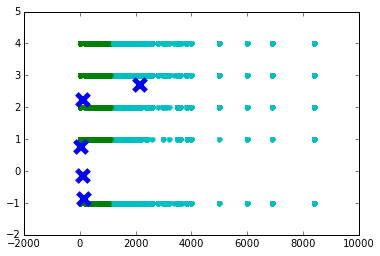

In [17]:
colors = ["g.", "r.", "c.", "b.", "y."]

for i in range(len(consume)):
    # print "coordinate:", consume[i], "label:", labels[i]
    plt.plot(consume[i][0], consume[i][1], colors[labels[i]], markersize=10)
    
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=150, linewidth=5, zorder=10)
plt.show()